# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [2]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합

In [3]:
#직접 선언
X = torch.tensor([[0,1,2],
                 [3,4,5],
                 [6,7,8],
                 [9,10,11]])
Y = torch.tensor([[12,13,14],
                 [15,16,17],
                 [18,19,20],
                 [21,22,23]])

In [4]:
X = torch.arange(12).reshape(4,3)
Y = torch.arange(12,24).reshape(4,3)

# 행으로 병합 코드
rowwise = torch.cat((X,Y),dim=0)
# 열로 병합 코드
columnwise = torch.cat((X,Y),dim=1)

print("X =", X)
print("Y =",Y)
print("\n행으로 병합하면", rowwise)
print("열로 병합하면", columnwise)

X = tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
Y = tensor([[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]])

행으로 병합하면 tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]])
열로 병합하면 tensor([[ 0,  1,  2, 12, 13, 14],
        [ 3,  4,  5, 15, 16, 17],
        [ 6,  7,  8, 18, 19, 20],
        [ 9, 10, 11, 21, 22, 23]])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [5]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

In [7]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [8]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [9]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.1268, -0.4328]) 
label: tensor([5.7747])


In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
        ##이하는 반복문에 대한 조건입니다.
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.3601, -1.0650],
        [ 1.3995, -0.7585],
        [ 0.2190, -1.0813],
        [ 0.5126,  0.0118],
        [ 0.6281, -0.9125],
        [-1.2184,  0.6945],
        [ 1.1377, -1.7759],
        [ 1.9926, -2.3128],
        [-0.9722, -0.0144],
        [ 0.2735,  0.2587],
        [ 1.0725,  0.6096],
        [ 1.1838, -1.1163],
        [-0.1239, -0.2064],
        [ 0.5233, -0.5047],
        [-0.3310, -0.6808],
        [-1.0052, -0.7210],
        [ 0.0452,  0.3755],
        [ 1.4867,  0.8730],
        [-0.0724, -0.2524],
        [ 1.4305, -0.4233]]) 
 tensor([[ 6.0116],
        [10.8401],
        [ 7.7832],
        [ 7.0163],
        [ 8.7476],
        [ 0.8117],
        [11.5832],
        [14.9296],
        [ 2.6199],
        [ 5.9250],
        [ 7.8095],
        [10.7202],
        [ 5.4649],
        [ 7.8307],
        [ 5.5435],
        [ 3.5702],
        [ 5.0715],
        [ 8.6602],
        [ 5.6568],
        [10.4359]])


In [32]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([4.0], requires_grad = True) #requires grad 중요

In [33]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w) + b 

In [34]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return torch.mean((y_hat-y)**2)

In [35]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            if param.grad is not None:
                param -= lr * param.grad / batch_size
                param.grad.zero_() #grad 초기화

In [36]:
lr = 0.01 
num_epochs = 200
net = linreg
loss = squared_loss

w_list = []
loss_list = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
    w_list.append(w.clone().detach().numpy())
    loss_list.append(torch.mean(train_l))

epoch 1, loss 10.845457
epoch 2, loss 8.900849
epoch 3, loss 7.305291
epoch 4, loss 5.996089
epoch 5, loss 4.921751
epoch 6, loss 4.040114
epoch 7, loss 3.316575
epoch 8, loss 2.722758
epoch 9, loss 2.235376
epoch 10, loss 1.835348
epoch 11, loss 1.506988
epoch 12, loss 1.237443
epoch 13, loss 1.016163
epoch 14, loss 0.834504
epoch 15, loss 0.685360
epoch 16, loss 0.562902
epoch 17, loss 0.462355
epoch 18, loss 0.379792
epoch 19, loss 0.311991
epoch 20, loss 0.256312
epoch 21, loss 0.210585
epoch 22, loss 0.173028
epoch 23, loss 0.142179
epoch 24, loss 0.116840
epoch 25, loss 0.096026
epoch 26, loss 0.078927
epoch 27, loss 0.064880
epoch 28, loss 0.053339
epoch 29, loss 0.043857
epoch 30, loss 0.036065
epoch 31, loss 0.029663
epoch 32, loss 0.024401
epoch 33, loss 0.020077
epoch 34, loss 0.016524
epoch 35, loss 0.013603
epoch 36, loss 0.011202
epoch 37, loss 0.009229
epoch 38, loss 0.007607
epoch 39, loss 0.006273
epoch 40, loss 0.005177
epoch 41, loss 0.004275
epoch 42, loss 0.003534


In [37]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-3.7193e-05, -2.3580e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([-0.0002], grad_fn=<RsubBackward1>)


\+ cost graph 그리기 (x축 w, y축 loss)

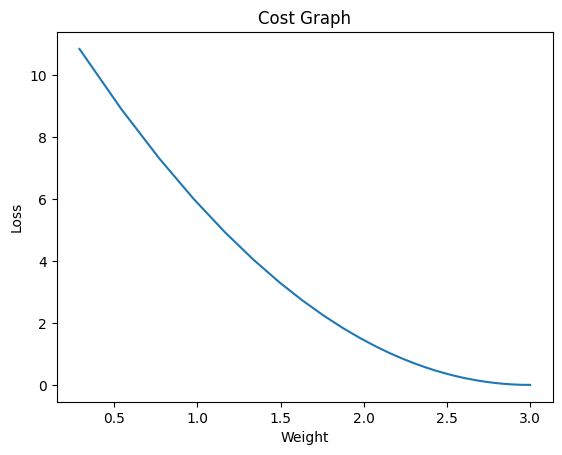

In [53]:
import numpy as np
import matplotlib.pyplot as plt

w_list1 = np.array(w_list)
loss_list1 = np.array(loss_list)

plt.plot(w_list1[:, 0], loss_list1)
plt.title('Cost Graph')
plt.ylabel('Loss')
plt.xlabel('Weight')
plt.show() 

### Concise Implementation of Linear Regression
- API 사용해보기

In [40]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [41]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [42]:
next(iter(data_iter))

[tensor([[-0.3147, -0.9991],
         [-0.0512,  0.5785],
         [ 0.0865, -1.8731],
         [ 0.5463, -0.8171],
         [-0.1054,  0.5491],
         [ 0.4881, -0.0617],
         [-1.5883,  0.3409],
         [-0.0480, -0.9601],
         [-0.9876, -1.3973],
         [-0.0871, -0.2098],
         [-1.6788, -0.1668],
         [ 0.5060, -0.2095],
         [-2.0846, -1.3338],
         [ 0.0752, -1.5302],
         [-0.1247,  0.9708],
         [-1.4548,  0.5902],
         [-0.3093,  0.0646],
         [-1.1384, -0.0076],
         [-0.4213, -0.4647],
         [ 0.7378, -1.8903]]),
 tensor([[ 6.0628],
         [ 4.4808],
         [ 8.5680],
         [ 8.3676],
         [ 4.3488],
         [ 7.0623],
         [ 0.2176],
         [ 6.7990],
         [ 4.6415],
         [ 5.5467],
         [ 0.7280],
         [ 7.3346],
         [ 1.2605],
         [ 8.0397],
         [ 3.6647],
         [ 0.2375],
         [ 4.4794],
         [ 2.1073],
         [ 4.9435],
         [10.5424]])]

In [43]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [44]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [45]:
loss = nn.MSELoss() ###api function으로 직접 설정

In [49]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01) ###api function으로 직접 설정

In [50]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.717597
epoch 2, loss 0.012650
epoch 3, loss 0.000334


In [51]:
w = net[0].weight.data ##학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0052, -0.0055])
error in estimating b: tensor([0.0134])
